# Atividade: Clustering
1. Escolher uma base de dados real (remova o atributo classe) e agrupar usando o algoritmo kMeans.

2. Teste diferentes valores de k e escolha o melhor resultado usando a métrica de silhueta.

3. Inspecione os centroides encontrados para verificar as diferenças entre os grupos encontrados.

4. Vc pode testar outros algoritmos de clustering disponíveis no sklearn para melhorar os resultados.

In [1]:
# avoid KMEANS warning You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
import os
os.environ['OMP_NUM_THREADS']='1'

In [2]:
# imports

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm

from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn.metrics import silhouette_samples, silhouette_score

RND_STATE = 10

## Dataset

In [3]:
df = sns.load_dataset('iris')

df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
dataframe = df.drop(columns=['species'])
labels = df['species']

(dataframe.shape, labels.shape)

((150, 4), (150,))

### Visualizando os dados

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


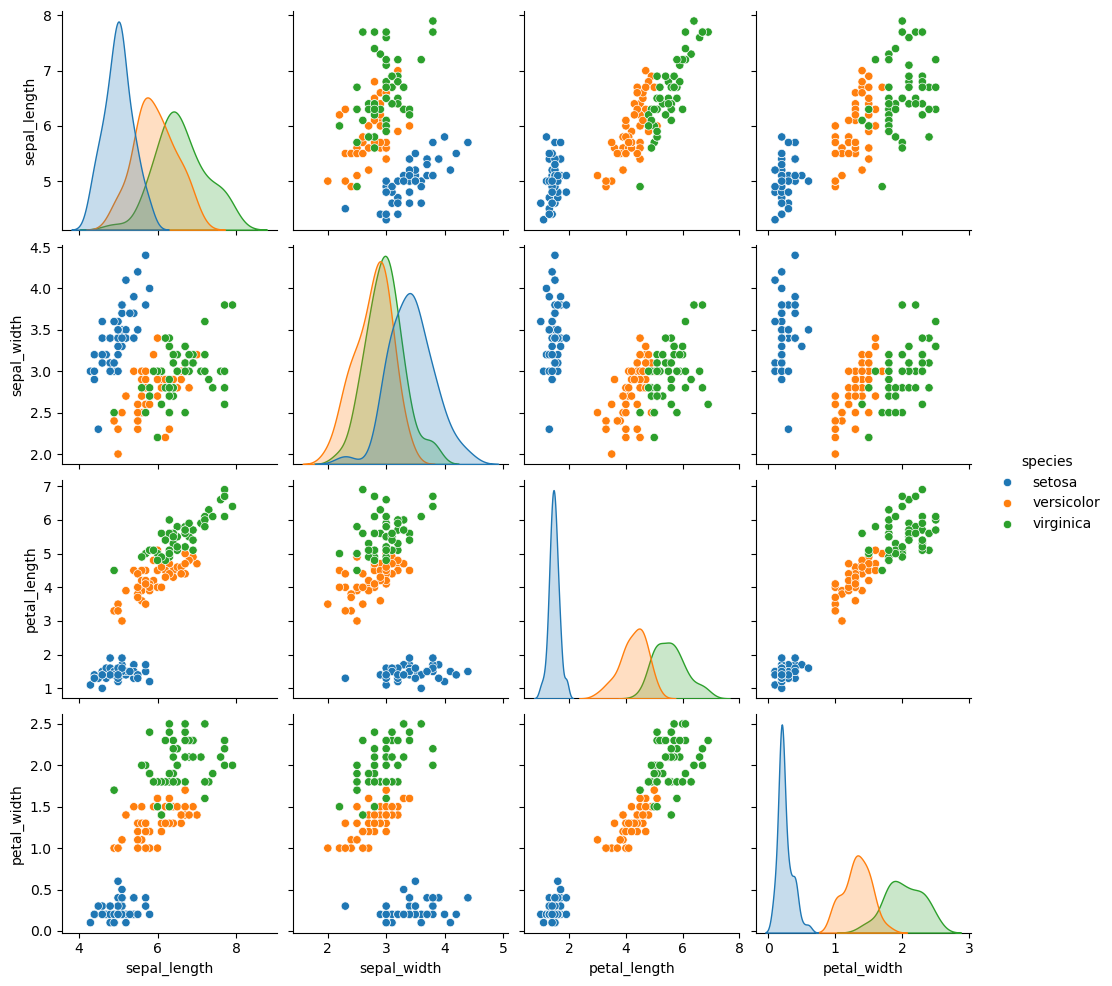

In [6]:
sns.pairplot(df, hue='species')

<Axes: >

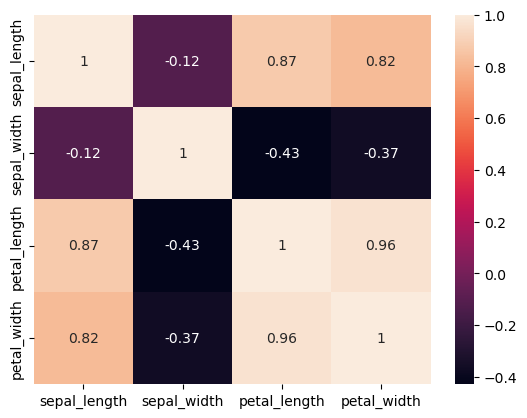

In [21]:
sns.heatmap(dataframe.corr(), annot=True)

## Utilizando o KMeans

### Determinando o K - Cotovelo e Silhueta

In [7]:
def calculate_inercias(X, list_k):
    inertias_list = []

    for k in list_k:
        kmeans = KMeans(n_clusters=k, random_state=RND_STATE)
        kmeans.fit(X)

        inertia = kmeans.inertia_
        inertias_list.append(inertia)

    return inertias_list

In [8]:
def plot_elbow(list_k, inertias):
    plt.figure(figsize=(8, 5))
    plt.title('Elbow Method')
    plt.plot(list_k, inertias, '-o')

    plt.xlabel('K')
    plt.ylabel('Inertia')

    plt.show()

In [9]:
inertias = calculate_inercias(dataframe, range(1, 8))

for int, k in zip(inertias, range(1, 8)):
    print(f'Inertia for k={k}: {int}')

Inertia for k=1: 681.3705999999996
Inertia for k=2: 152.34795176035797
Inertia for k=3: 78.85566582597727
Inertia for k=4: 57.38387326549491
Inertia for k=5: 46.692700000000016
Inertia for k=6: 42.09902883597884
Inertia for k=7: 35.00710191975779


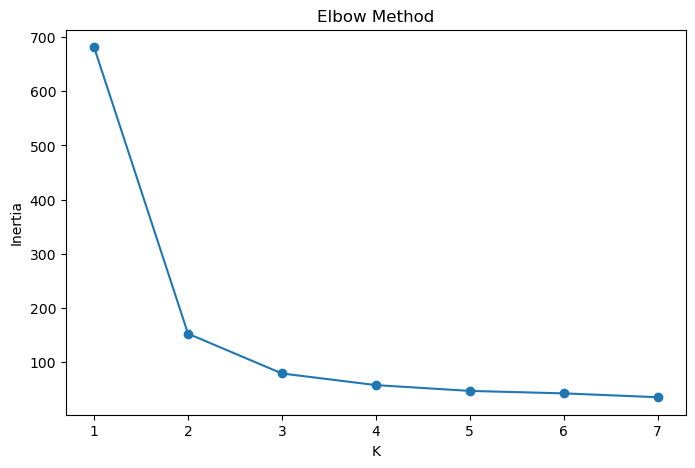

In [10]:
plot_elbow(range(1, 8), inertias)

### Determinando o K - Método da Silhueta

In [18]:
X = df.drop(columns=['species']).to_numpy()
y = df['species'].to_numpy()

For n_clusters = 2 The average silhouette_score is : 0.6810461692117465
For n_clusters = 3 The average silhouette_score is : 0.5511916046195927
For n_clusters = 4 The average silhouette_score is : 0.49535632852885064
For n_clusters = 5 The average silhouette_score is : 0.48989824728439524
For n_clusters = 6 The average silhouette_score is : 0.47711750058213453


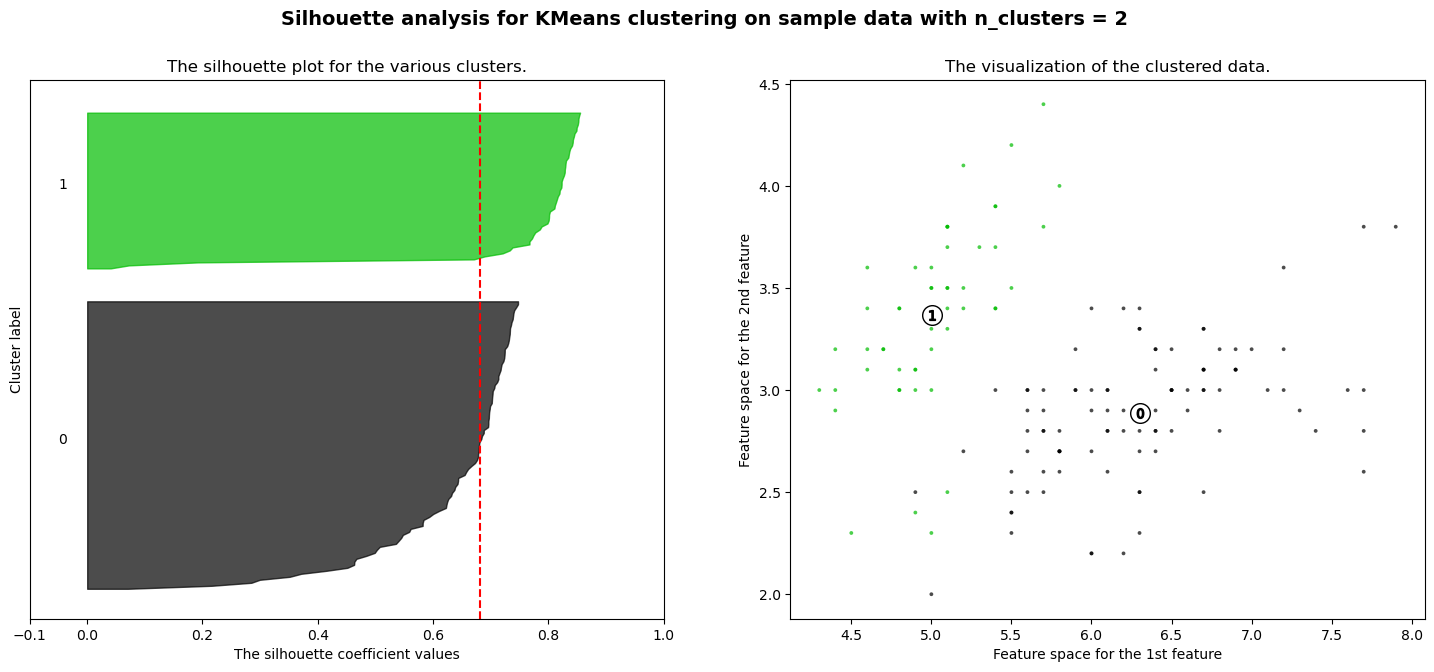

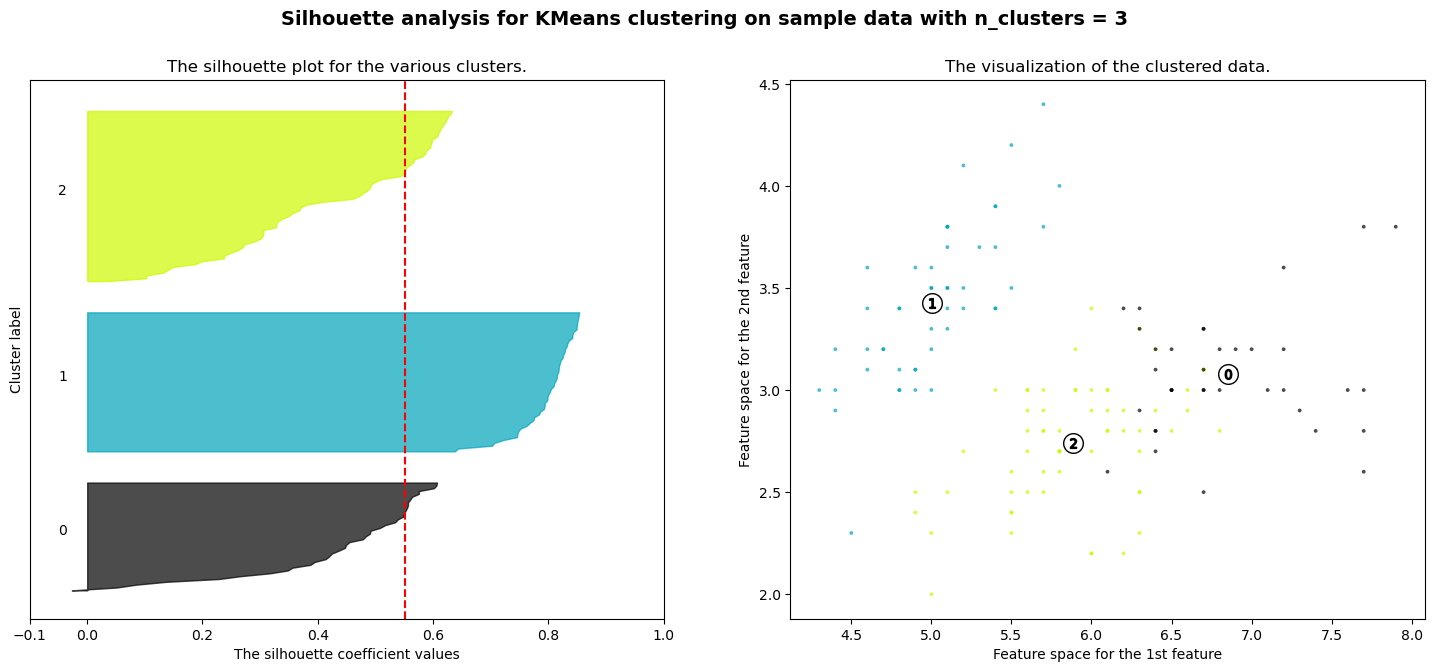

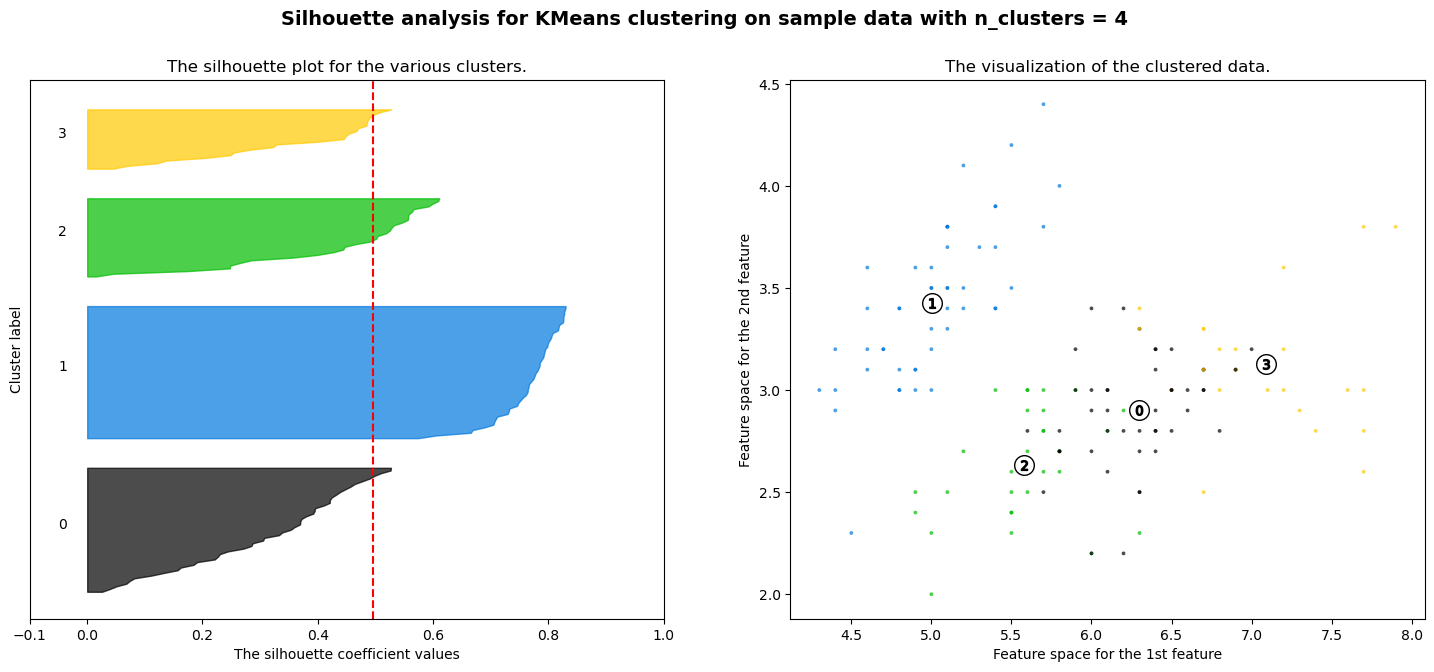

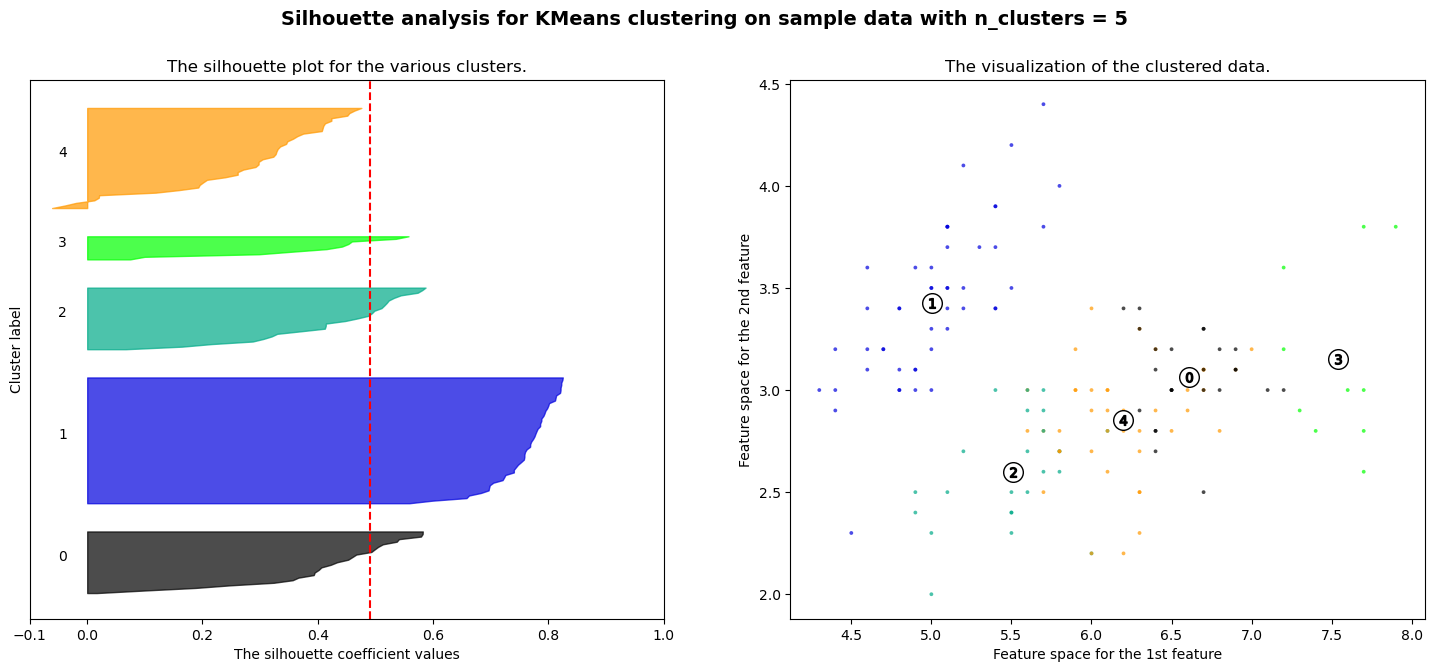

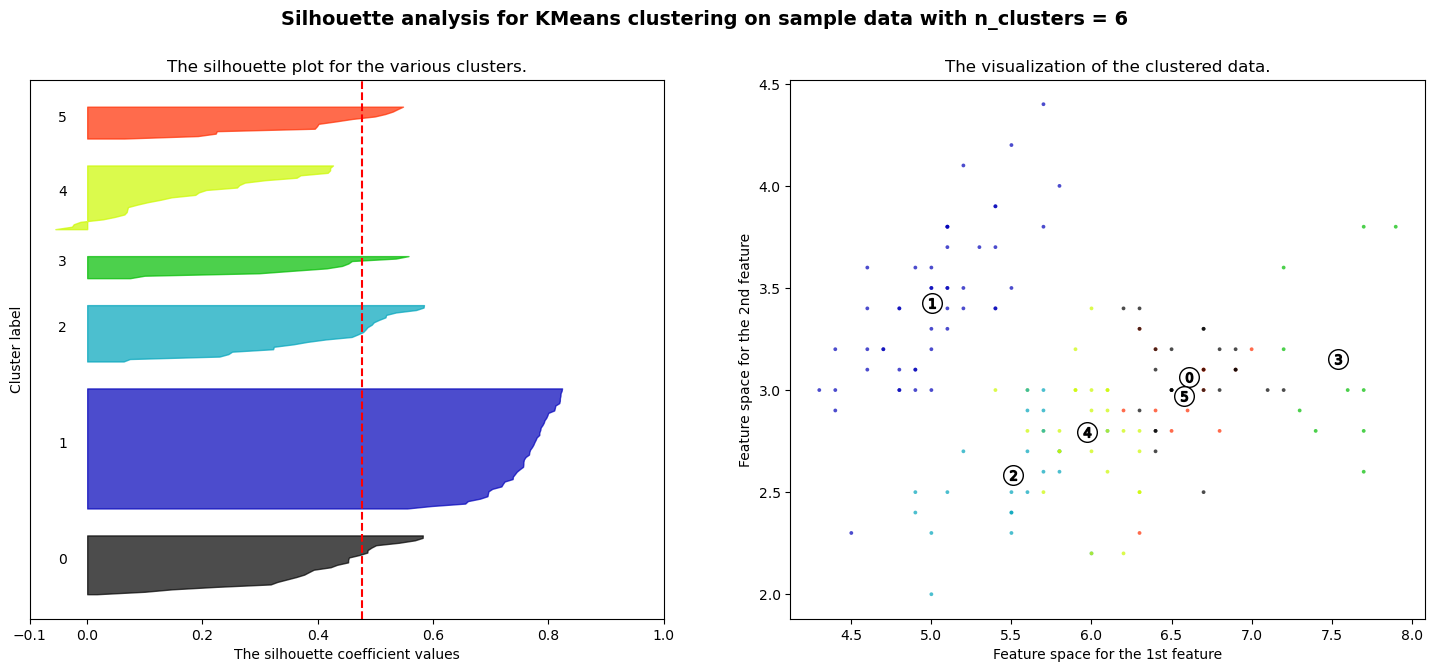

In [19]:
# source: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

## Aplicando DBSCAN

In [32]:
def plot_dbscan(X_df, eps, min_pts):
     # Instanciamento e fit do modelo
    dbscan = DBSCAN(eps = eps, min_samples = min_pts)
    dbscan.fit(X_df)

    # ========================================
    # estruturação dos resultados
    labels_clusters = dbscan.labels_
    labels_series = pd.Series(labels_clusters, name="label")

    df_result = pd.concat([X_df, labels_series], axis=1)
    n_clusters = pd.Series(labels_clusters).nunique()

    # ========================================
    print(f"DBSCAN com eps={eps} e minPts={min_pts}\nNúmero de clusters: {n_clusters}")
    sns.jointplot(data=df_result, hue="label", x="sepal_length", y="sepal_width", kind="scatter")
    plt.show()
    
    print("Quantidade de pontos em cada clusters:")
    print(pd.Series(labels_clusters).value_counts())
    
    return df_result, n_clusters

DBSCAN com eps=0.5 e minPts=5
Número de clusters: 3


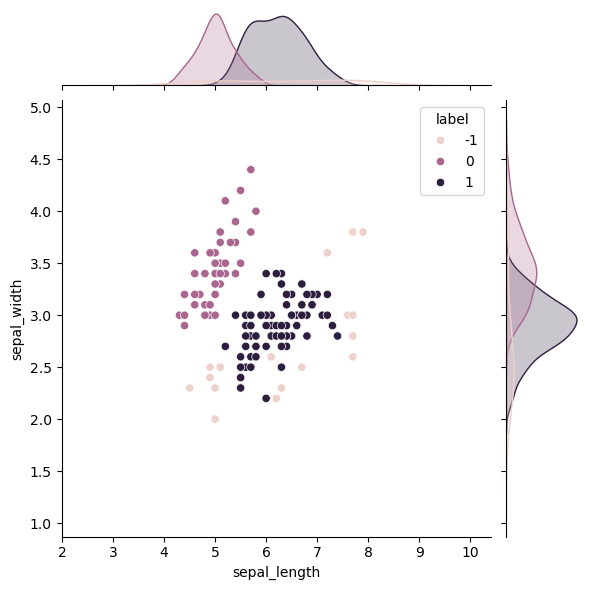

Quantidade de pontos em cada clusters:
 1    84
 0    49
-1    17
Name: count, dtype: int64
Quantidade de clusters: 3



DBSCAN com eps=0.5 e minPts=7
Número de clusters: 3


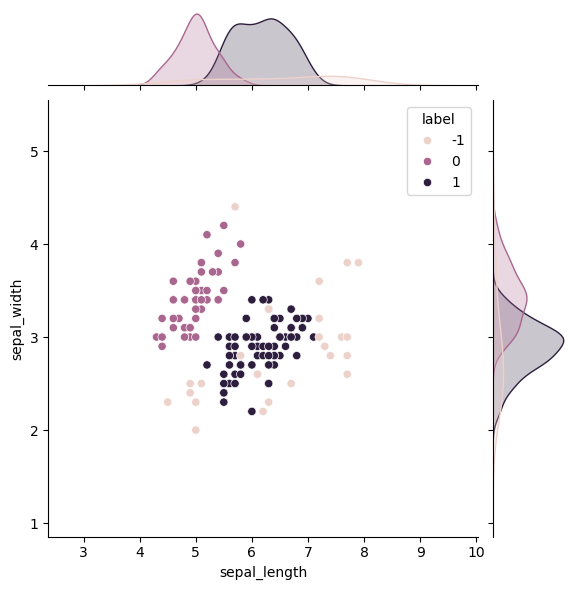

Quantidade de pontos em cada clusters:
 1    78
 0    48
-1    24
Name: count, dtype: int64
Quantidade de clusters: 3



DBSCAN com eps=1 e minPts=5
Número de clusters: 2


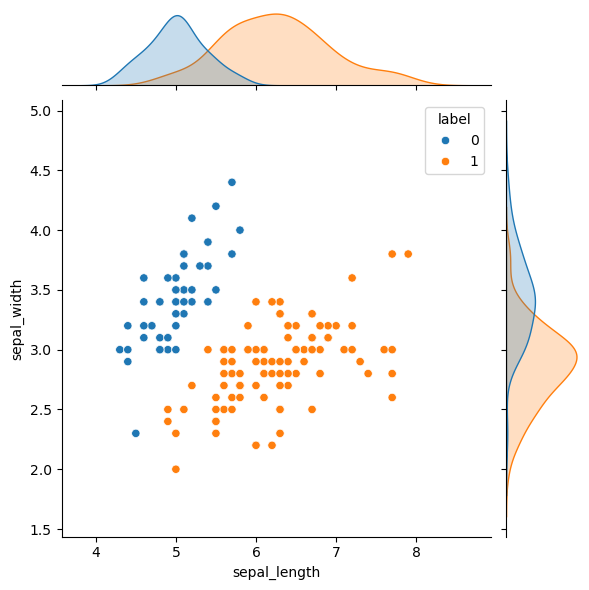

Quantidade de pontos em cada clusters:
1    100
0     50
Name: count, dtype: int64
Quantidade de clusters: 2



DBSCAN com eps=1 e minPts=7
Número de clusters: 2


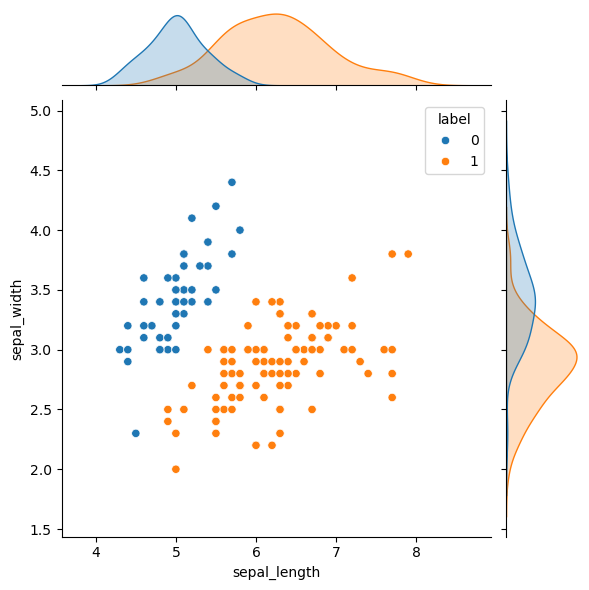

Quantidade de pontos em cada clusters:
1    100
0     50
Name: count, dtype: int64
Quantidade de clusters: 2



DBSCAN com eps=1.5 e minPts=5
Número de clusters: 2


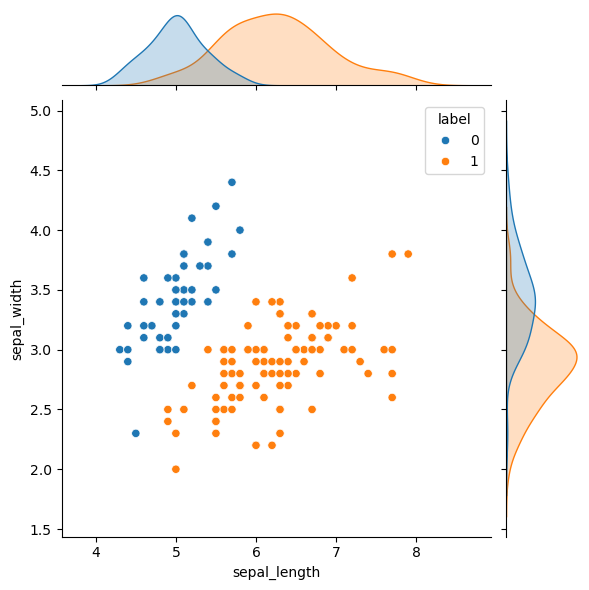

Quantidade de pontos em cada clusters:
1    100
0     50
Name: count, dtype: int64
Quantidade de clusters: 2



DBSCAN com eps=1.5 e minPts=7
Número de clusters: 2


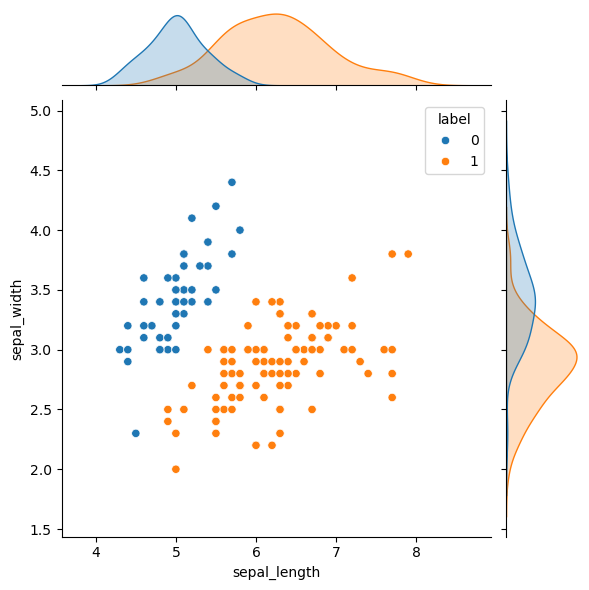

Quantidade de pontos em cada clusters:
1    100
0     50
Name: count, dtype: int64
Quantidade de clusters: 2





In [33]:
params = [
    {'eps': 0.5, 'min_samples': 5},
    {'eps': 0.5, 'min_samples': 7},
    {'eps': 1, 'min_samples': 5},
    {'eps': 1, 'min_samples': 7},
    {'eps': 1.5, 'min_samples': 5},
    {'eps': 1.5, 'min_samples': 7},
]

for p in params:
    _, n_clusters = plot_dbscan(
        dataframe,
        eps = p['eps'],
        min_pts = p['min_samples'],
    )

    print(f"Quantidade de clusters: {n_clusters}")
    print("\n\n")


## Aplicando Spectral Clustering

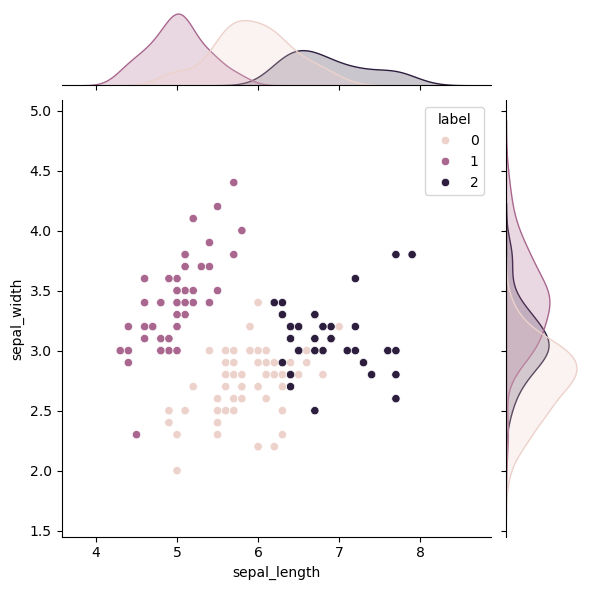

In [34]:
sc = SpectralClustering(n_clusters=3, random_state=RND_STATE)

sc.fit(dataframe)
labels = sc.labels_

df_result = pd.concat([dataframe, pd.Series(labels, name='label')], axis=1)

sns.jointplot(data=df_result, hue='label', x='sepal_length', y='sepal_width', kind='scatter')